In [6]:
import os
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt


import torch
import torchvision
from torch import nn
import torchvision.transforms.v2 as T
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

In [7]:
train_data_path = Path(r"C:\Users\bamilosin\Documents\dataset\vision\food vision data\pizza_steak_sushi-20%\train")
test_data_path = Path(r"C:\Users\bamilosin\Documents\dataset\vision\food vision data\pizza_steak_sushi-20%\test")

BATCH_SIZE = 32
transforms = T.Compose([
    T.ToImage(),
    T.Resize((128,128)),
    T.ToDtype(torch.float, scale=True)
])

train_dataset = ImageFolder(train_data_path, transform=transforms)
test_dataset = ImageFolder(test_data_path, transform=transforms)

train_dataloader = DataLoader(train_dataset, BATCH_SIZE, shuffle=True, num_workers=os.cpu_count())
test_dataloader = DataLoader(test_dataset, BATCH_SIZE, shuffle=True, num_workers=os.cpu_count())

In [13]:
images, labels = next(iter(train_dataloader))

In [8]:
idx_to_class = {value : label for label, value in train_dataset.class_to_idx.items()}
idx_to_class

{0: 'pizza', 1: 'steak', 2: 'sushi'}

### plot random samples from data

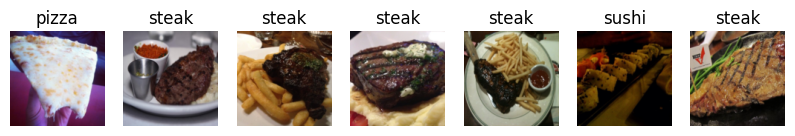

In [11]:
samples = torch.randperm(len(train_dataset))[:7]
fig, axs = plt.subplots(nrows=1, ncols=7, figsize=(10,5))
for i,sample in enumerate(samples):
    image = train_dataset[sample][0].permute(1,2,0)
    axs[i].imshow(image)
    label = idx_to_class[train_dataset[sample][1]]
    axs[i].set_title(label)
    axs[i].axis("off")
plt.show()

### Replicating ViT
In order to make research paper's more understandable, break it down into simpler pieces

Inputs: what goes into the model? (in our case, image tensors)

Outputs: what comes out of the model/layer/block? (in our case, we want the model to output image classification labels)

Layers: Takes an input, manipulates it with a function (for example could be self-attention)

Blocks: A collection of layers

Model: A collection of Blocks


### ViT overview: pieces of the puzzle

* Figure 1: Visual overview of the architecture
* Four equations: math equations which define the functions of each layer/block
 

Equation 1

x_input = [class_token, image_patch1, image_patch2 ... image_patch_N] + [class_token_pos, image_patch1_pos, image_patch2_pos ... image_patch_N_pos]

Equation 2

x_output_msa_block = MSA_layer(LN_layer(x_input)) + x_input

Equation 3

x_output_mlp_block = mlp_layer(ln_layer(x_output_msa_block)) + x_output_msa_block

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

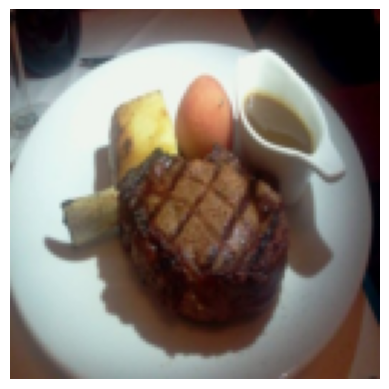

In [29]:
### break image intp patches
to_patchify = images[0].permute(1,2,0)
plt.imshow(to_patchify)
plt.axis(False)

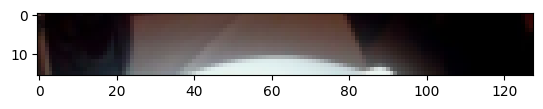

In [41]:
plt.imshow(to_patchify[:16, :, :])

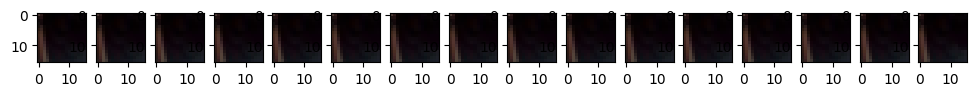

In [46]:
PATCH_SIZE = 16
fig, axs = plt.subplots(nrows=1, ncols=PATCH_SIZE, figsize=(12,5))
for i in range(PATCH_SIZE):
    axs[i].imshow(to_patchify[:PATCH_SIZE, :PATCH_SIZE, :])
    